In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mit-plagairism-detection-dataset/train_snli.txt


![](https://s3.amazonaws.com/libapps/accounts/72996/images/Infographic_Did-I-Plagiarize1.jpg)library.an.edu

In [2]:
from collections import Counter

In [3]:
#Codes by Jay Lee https://www.kaggle.com/jayaos/basic-nlp-preprocessing-of-corpus-and-zipf-s-law/notebook

def read_docu(file):
    
    all_words = []
    
    with open(file, "r", encoding = "utf-8") as input_file:
        for line in input_file:
            line = line.lower()
            line = line.strip().split()
            all_words += line
        return(all_words)

In [4]:
#Codes by Jay Lee https://www.kaggle.com/jayaos/basic-nlp-preprocessing-of-corpus-and-zipf-s-law/notebook

def word_counter(all_words):
    
    word_count = Counter()
    for word in all_words:
        word_count[word] += 1
    return(word_count.values())

In [5]:
def draw_zipfian_curve(word_count):
    plt.plot(sorted(word_count, reverse = True), marker = "o")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("log(Rank)")
    plt.ylabel("log(Frequency)")
    plt.show()

In [6]:
#Codes by Jay Lee https://www.kaggle.com/jayaos/basic-nlp-preprocessing-of-corpus-and-zipf-s-law/notebook

def zipfian_plot(file):
    word_corpus = read_docu(file)
    counts = word_counter(word_corpus)
    draw_zipfian_curve(counts)

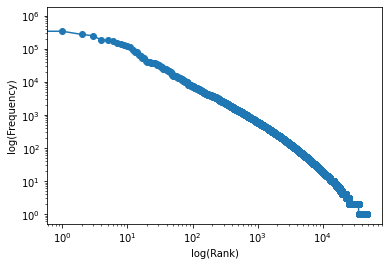

In [7]:
zipfian_plot("../input/mit-plagairism-detection-dataset/train_snli.txt")

In [8]:
df= pd.read_csv('../input/mit-plagairism-detection-dataset/train_snli.txt', sep='\t', error_bad_lines=False)
df.head()

,A person on a horse jumps over a broken down airplane.,"A person is at a diner, ordering an omelette.",0
0,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
1,Children smiling and waving at camera,There are children present,1
2,Children smiling and waving at camera,The kids are frowning,0
3,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0
4,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,1


In [9]:
df.isnull().sum()

A person on a horse jumps over a broken down airplane.    0
A person is at a diner, ordering an omelette.             4
0                                                         0
dtype: int64

#Basic Text Mining Methods

#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

In [10]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# lets create a text
text = "Two blond women are hugging one another"

# length of text ( includes spaces)
print("length of text: ",len(text))

# split the text
splitted_text = text.split() # default split methods splits text according to spaces
print("Splitted text: ",splitted_text)    # splitted_text is a list that includes words of text sentence
# each word is called token in text maning world.

length of text:  39
Splitted text:  ['Two', 'blond', 'women', 'are', 'hugging', 'one', 'another']


#One blond and one brunette hugging

![](https://media3.giphy.com/media/3o7TKu8D1d12Eo9wSQ/200.webp?cid=ecf05e47kvwtv10cwpvgpqc7bp8lzplbypvzsvdop4b3aoor&rid=200.webp&ct=g)

In [11]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# find specific words with list comprehension method
specific_words = [word for word in splitted_text if(len(word)>2)]
print("Words which are more than 3 letter: ",specific_words)

# capitalized words with istitle() method that finds capitalized words
capital_words = [ word for word in splitted_text if word.istitle()]
print("Capitalized words: ",capital_words)

# words which end with "o": endswith() method finds last letter of word
words_end_with_o =  [word for word in splitted_text if word.endswith("o")]
print("words end with o: ",words_end_with_o) 

# words which starts with "w": startswith() method
words_start_with_w = [word for word in splitted_text if word.startswith("w")]
print("words start with w: ",words_start_with_w) 

Words which are more than 3 letter:  ['Two', 'blond', 'women', 'are', 'hugging', 'one', 'another']
Capitalized words:  ['Two']
words end with o:  ['Two']
words start with w:  ['women']


In [12]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# unique with set() method
print("unique words: ",set(splitted_text))  # actually the word "no" is occured twice bc one word is "no" and others "No" there is a capital letter at first letter

# make all letters lowercase with lower() method
lowercase_text = [word.lower() for word in splitted_text]

# then find uniques again with set() method
print("unique words: ",set(lowercase_text))

unique words:  {'blond', 'another', 'women', 'hugging', 'one', 'are', 'Two'}
unique words:  {'blond', 'another', 'two', 'women', 'hugging', 'one', 'are'}


In [13]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# check words includes or not includes particular substring or letter
print("Is w letter in women word:", "w" in "women")

# check words are upper case or lower case
print("Is word uppercase:", "WOMEN".isupper())
print("Is word lowercase:", "hugging".islower())

# check words are made of by digits or not
print("Is word made of by digits: ","12345".isdigit())

# get rid of from white space characters like spaces and tabs or from unwanted letters with strip() method
print("00000000Two blond: ","00000000Two blond".strip("0"))

# find particular letter from front 
print("Find particular letter from back: ","one another".find("r"))  # at index 1

# find particular letter from back  rfind = reverse find
print("Find particular letter from back: ","one another".rfind("r"))  # at index 8

# replace letter with number
print("Replace o with 4 ", "one another".replace("r","4"))

# find each letter and store them in list
print("Each letter: ",list("Two blond"))

Is w letter in women word: True
Is word uppercase: True
Is word lowercase: True
Is word made of by digits:  True
00000000Two blond:  Two blond
Find particular letter from back:  10
Find particular letter from back:  10
Replace o with 4  one anothe4
Each letter:  ['T', 'w', 'o', ' ', 'b', 'l', 'o', 'n', 'd']


In [14]:
# Cleaning text
text1 = "    The kids are frowning    "
print("Split text: ",text1.split(" "))   # as you can see there are unnecessary white space in list

# get rid of from these unnecassary white spaces with strip() method then split
print("Cleaned text: ",text1.strip().split(" "))

Split text:  ['', '', '', '', 'The', 'kids', 'are', 'frowning', '', '', '', '']
Cleaned text:  ['The', 'kids', 'are', 'frowning']


#The kids are frowning

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDA0-IIN22I8dAyOi2MYdRitGCHvfuP3vqMg&usqp=CAU)bckonline.com

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMbo8VhVRJMVkL2po2vlSazhRqaunWvN7k1A&usqp=CAU)dogtrainingobedienceschool.com

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSxBSFCHC_lNgrpUOTgk5kOZU4QSsKALegXGQ&usqp=CAU)memecreator.org

In [15]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# reading files line by line
f = open("../input/mit-plagairism-detection-dataset/train_snli.txt","r")

# read first line
print(f.readline())

# length of text
text3=f.read()
print("Length of text: ",len(text3))

# Number of lines with splitlines() method
lines = text3.splitlines()
print("Number of lines: ",len(lines))

A person on a horse jumps over a broken down airplane.	A person is at a diner, ordering an omelette.	0

Length of text:  38743027
Number of lines:  367372


In [16]:
df = df.rename(columns={'A person on a horse jumps over a broken down airplane.':'person', 'A person is at a diner, ordering an omelette.': 'omelette'})

In [17]:
df.head()

,person,omelette,0
0,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
1,Children smiling and waving at camera,There are children present,1
2,Children smiling and waving at camera,The kids are frowning,0
3,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0
4,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.,1


In [18]:
# find which entries contain the word 'appointment'
print("In this text, the rate of occuring boy word is: ",sum(df.person.str.contains('boy'))/len(df))
# text
text = df.person[1]
print(text)

In this text, the rate of occuring boy word is:  0.07259943599403329
Children smiling and waving at camera


In [19]:
#I´m saving that snippet since there is No callout that started with @.  

# find regular expression on text
# import regular expression package
import re
# find callouts that starts with @
callouts = [word for word in text.split(" ") if re.search("@[A-Za-z0-9_]+",word)]
print("callouts: ",callouts)

callouts:  []


In [20]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# find specific characters like "w"
print(re.findall(r"[w]",text))
# "w"ith, "w"indo"w", sho"w"ing, s"w"itches 

# do not find specific character like "w". We will use "^" symbol
print(re.findall(r"[^w]",text))

['w']
['C', 'h', 'i', 'l', 'd', 'r', 'e', 'n', ' ', 's', 'm', 'i', 'l', 'i', 'n', 'g', ' ', 'a', 'n', 'd', ' ', 'a', 'v', 'i', 'n', 'g', ' ', 'a', 't', ' ', 'c', 'a', 'm', 'e', 'r', 'a']


In [21]:
# Regular expressions for Dates
#date = "15-10-2000\n09/10/2005\n15-05-1999\n05/05/99\n\n05/05/199\n\n05/05/9"
#re.findall(r"\d{1,2}[/-]\d{1,2}[/-]\d{1,4}",date)

#Natural Language Process (NLP)

In [22]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# import natural language tool kit
import nltk as nlp

# counting vocabulary of words
text = df.person[1]
splitted = text.split(" ")
print("number of words: ",len(splitted))

# counting unique vocabulary of words
text = df.person[1]
print("number of unique words: ",len(set(splitted)))

# print first five unique words
print("first 5 unique words: ",list(set(splitted))[:5])

# frequency of words 
dist = nlp.FreqDist(splitted)
print("frequency of words: ",dist)

# look at keys in dist
print("words in person: ",dist.keys())

# count how many time a particalar value occurs. Lets look at "box"
print("the word box is occured how many times:",dist["box"])

number of words:  6
number of unique words:  6
first 5 unique words:  ['at', 'smiling', 'Children', 'and', 'camera']
frequency of words:  <FreqDist with 6 samples and 6 outcomes>
words in person:  dict_keys(['Children', 'smiling', 'and', 'waving', 'at', 'camera'])
the word box is occured how many times: 0


#Normalization and Stemming words

Normalization is different forms of the same word like have and having.

Stemming is finding a root of the words like having => have.

In [23]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# normalization
words = "task Tasked tasks tasking"
words_list = words.lower().split(" ")
print("normalized words: ",words_list)

# stemming
porter_stemmer = nlp.PorterStemmer()
roots = [porter_stemmer.stem(each) for each in words_list]
print("roots of task Tasked tasks tasking: ",roots)

normalized words:  ['task', 'tasked', 'tasks', 'tasking']
roots of task Tasked tasks tasking:  ['task', 'task', 'task', 'task']


#Lemmatization

In [24]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

# stemming
stemming_word_list = ["baseball","airplane","restaurant","drinking","outdoors"]
porter_stemmer = nlp.PorterStemmer()
roots = [porter_stemmer.stem(each) for each in stemming_word_list]
print("result of stemming: ",roots)

# lemmatization
lemma = nlp.WordNetLemmatizer()
lemma_roots = [lemma.lemmatize(each) for each in stemming_word_list]
print("result of lemmatization: ",lemma_roots)

result of stemming:  ['basebal', 'airplan', 'restaur', 'drink', 'outdoor']
result of lemmatization:  ['baseball', 'airplane', 'restaurant', 'drinking', 'outdoors']


#Tokenization

Splitting a sentence into words(tokens)

In [25]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

text_t = "Two groups of rival gang members flipped each other off."
print("split the sentence: ", text_t.split(" "))  # 5 words

# tokenization with nltk
print("tokenize with nltk: ",nlp.word_tokenize(text_t))

split the sentence:  ['Two', 'groups', 'of', 'rival', 'gang', 'members', 'flipped', 'each', 'other', 'off.']
tokenize with nltk:  ['Two', 'groups', 'of', 'rival', 'gang', 'members', 'flipped', 'each', 'other', 'off', '.']


In [26]:
# categorical features with missing values
categorical_nan = [feature for feature in df.columns if df[feature].isna().sum()>0 and df[feature].dtypes=='O']
print(categorical_nan)

['omelette']


In [27]:
# replacing missing values in categorical features
for feature in categorical_nan:
    df[feature] = df[feature].fillna('None')

In [28]:
df[categorical_nan].isna().sum()

omelette    0
dtype: int64

![](https://lh3.googleusercontent.com/proxy/yYlC3n6FpIzN6mD8ARFVHdA95sUL1t7Ry9klJivqXwfxfh0OpPxPWNJjCJ0sYaf9ObDrzKIyt4qp5LTVpYt6BA_N34iizT1lWJJSRcxbDY6QE4YvilzU4t2W63ZZgAgl_P1qKEFvcZIBlypF74PyMuGAtAShV8vIgOV22Q)m.quickmeme.com

In [29]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# %% creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer  # for bag of words 
max_features = 150 # max_features dimension reduction 
count_vectorizer = CountVectorizer(stop_words = "english",max_features = max_features) 
review_list = df.iloc[:,1] #fixed by Billa comment @skbilla

# stop_words parameter = automatically remove all stopwords 
# lowercase parameter 
# token_pattern removing other karakters like .. !

sparce_matrix = count_vectorizer.fit_transform(review_list).toarray() # sparce matrix yaratir bag of words model = sparce matrix

print("Most used {} words: {}".format(max_features,count_vectorizer.get_feature_names()))

y = df.iloc[:,0].values  # positive or negative comment

#sparce matrix includes independent variable

Most used 150 words: ['air', 'animal', 'asleep', 'baby', 'ball', 'band', 'baseball', 'basketball', 'beach', 'bed', 'bench', 'bike', 'black', 'blue', 'boat', 'boy', 'boys', 'brown', 'building', 'bus', 'camera', 'car', 'carrying', 'cat', 'child', 'children', 'city', 'climbing', 'clothes', 'couch', 'couple', 'crowd', 'dancing', 'dog', 'dogs', 'doing', 'dress', 'dressed', 'drinking', 'driving', 'eating', 'female', 'field', 'food', 'football', 'game', 'getting', 'girl', 'girls', 'going', 'grass', 'green', 'ground', 'group', 'guitar', 'guy', 'guys', 'hair', 'hands', 'hat', 'having', 'holding', 'holds', 'home', 'horse', 'house', 'human', 'indoors', 'inside', 'jacket', 'jumping', 'jumps', 'kid', 'kids', 'lady', 'lake', 'large', 'laying', 'little', 'looking', 'looks', 'making', 'man', 'men', 'music', 'near', 'ocean', 'old', 'outdoors', 'outside', 'park', 'people', 'performing', 'person', 'picture', 'play', 'player', 'players', 'playing', 'plays', 'pool', 'race', 'reading', 'red', 'restaurant', 

In [30]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sparce_matrix,y,test_size = 0.1,random_state = 0)

In [31]:
#That snippet take hours to provide GaussianNB ()??? . 

# %% naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(sparce_matrix,y)

GaussianNB()

In [32]:
#Another that spend too much time. Predict if I'm going to wait that. It's a retorical question.
#And worst: My Notebook failed after that!

# %% predict
#y_pred = nb.predict(sparce_matrix)

In [33]:
#%%
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y,y_pred)
#cm

NameError: name 'cm' is not defined

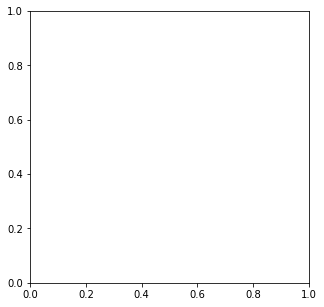

In [34]:
#Code by Datai https://www.kaggle.com/kanncaa1/applying-text-mining

import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()
plt.savefig('graph.png')

In [35]:
#Code By Paul Mooney

plagiarism_file = '../input/mit-plagairism-detection-dataset/train_snli.txt'
with open(plagiarism_file) as f: # The with keyword automatically closes the file when you are done
    print (f.read(3000))

A person on a horse jumps over a broken down airplane.	A person is at a diner, ordering an omelette.	0
A person on a horse jumps over a broken down airplane.	A person is outdoors, on a horse.	1
Children smiling and waving at camera	There are children present	1
Children smiling and waving at camera	The kids are frowning	0
A boy is jumping on skateboard in the middle of a red bridge.	The boy skates down the sidewalk.	0
A boy is jumping on skateboard in the middle of a red bridge.	The boy does a skateboarding trick.	1
An older man sits with his orange juice at a small table in a coffee shop while employees in bright colored shirts smile in the background.	A boy flips a burger.	0
Two blond women are hugging one another.	The women are sleeping.	0
Two blond women are hugging one another.	There are women showing affection.	1
A few people in a restaurant setting, one of them is drinking orange juice.	The people are sitting at desks in school.	0
A few people in a restaurant setting, one of them